<a href="https://colab.research.google.com/github/praaachii4596/fashion-mnist-classification-using-cnn/blob/main/Fashion_MNIST_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion MNIST Image Classification with CNN in Google Colab

### 1. Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 2. Loading Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 3. Preprocessing the images
- Reshape to (samples, 28,28,1) for CNN input
- Normalize pixel values to [0,1]

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

### 4. Defining class labels

In [4]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

### 5. Visualizing some training data samples

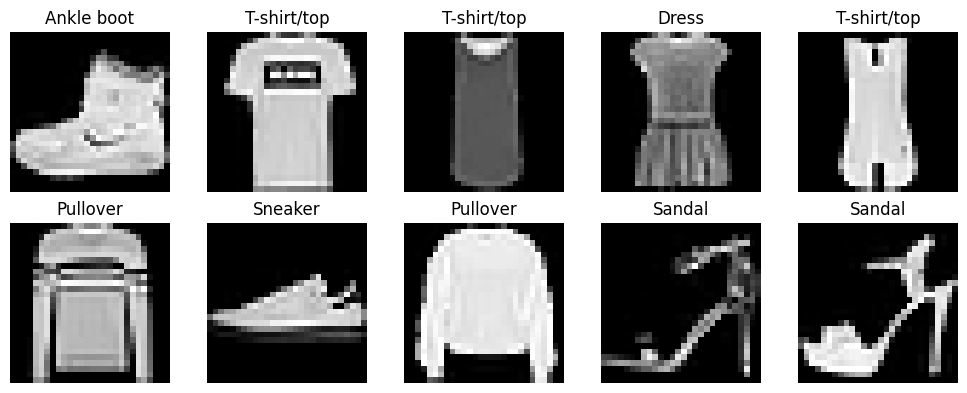

In [5]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 6. Building the Convolutional Neural Network model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 7. Compiling the model
- Using Adam optimizer
- Sparse categorical crossentropy for integer class labels

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 8. Training the model

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.7769 - loss: 0.6252 - val_accuracy: 0.8803 - val_loss: 0.3285
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.8844 - loss: 0.3156 - val_accuracy: 0.8913 - val_loss: 0.2895
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9024 - loss: 0.2658 - val_accuracy: 0.8993 - val_loss: 0.2709
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9142 - loss: 0.2324 - val_accuracy: 0.9077 - val_loss: 0.2582
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9238 - loss: 0.2053 - val_accuracy: 0.9055 - val_loss: 0.2547


### 9. Evaluating the model on test data

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9005 - loss: 0.2808
Test accuracy: 0.9009000062942505


### 10. Predicting and visualizing result for a test image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


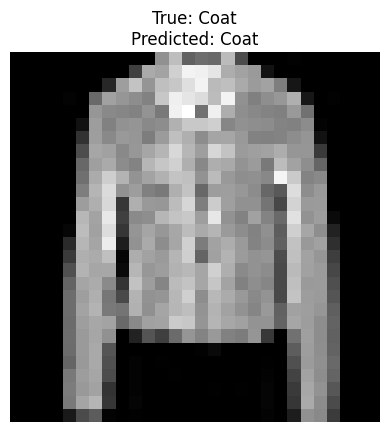

In [10]:
i = 10
pred = model.predict(x_test[i].reshape(1,28,28,1))
predicted_class = np.argmax(pred)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title(f"True: {class_names[y_test[i]]}\nPredicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

### 11. Visualizing training/validation accuracy and loss curves

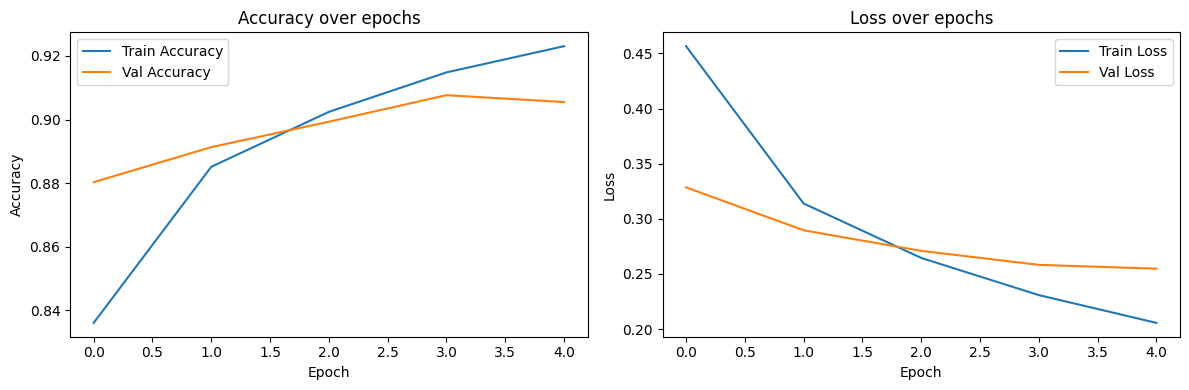

In [11]:
plt.figure(figsize=(12,4))

#Accuracy over Epochs plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss over Epochs plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()